In [51]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier




In [16]:

train=pd.read_csv("/Users/Matthieu/Downloads/digit/train.csv", delimiter=',') 
test=pd.read_csv("/Users/Matthieu/Downloads/digit/test.csv", delimiter=',') 


X_TRAIN = train.copy()
X_TEST = test.copy()


In [31]:
#découpage du label du chiffre avec l image mise en vecteur
X_train = X_TRAIN.iloc[:, 1:].values
Y_train = X_TRAIN.iloc[:, 0].values

X_test=X_TEST.iloc[:, 0:].values


print(Y_train[6])

7


In [25]:
#regression logistique
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

# Entraîner le modèle
model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)


/Users/Matthieu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print(model.predict([X_test[200, :]]))

[1]


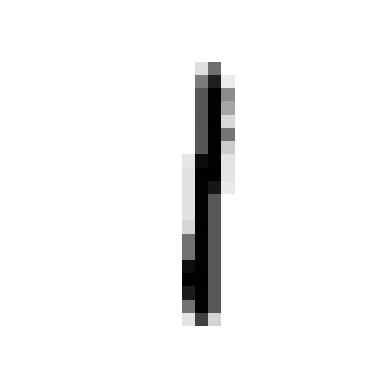

In [46]:
# returns the image in digit (28x28)
def getImageMatriceDigit(dataset, rowIndex):
    return dataset.iloc[rowIndex, 0:].values.reshape(28,28)
# returns the image matrix in one row
def getImageLineDigit(dataset, rowIndex):
    return dataset.iloc[rowIndex, 0:]

imgDigitMatrice = getImageMatriceDigit(X_TEST, 200)
imgDigit = getImageLineDigit(X_TEST, 200)
plt.imshow(imgDigitMatrice, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

Accuracy: 90.04%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       816
           1       0.94      0.97      0.96       909
           2       0.87      0.86      0.86       846
           3       0.89      0.87      0.88       937
           4       0.90      0.90      0.90       839
           5       0.84      0.84      0.84       702
           6       0.91      0.94      0.92       785
           7       0.93      0.91      0.92       893
           8       0.88      0.87      0.87       835
           9       0.88      0.90      0.89       838

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400

Confusion Matrix:
 [[772   0   2   2   1  18  15   2   3   1]
 [  0 886   9   2   1   2   1   2   5   1]
 [ 11  23 725  15  16   9  11  13  20   3]
 [  3   2  31 814   0  29   5   7  26  20]
 [  6   5

/Users/Matthieu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


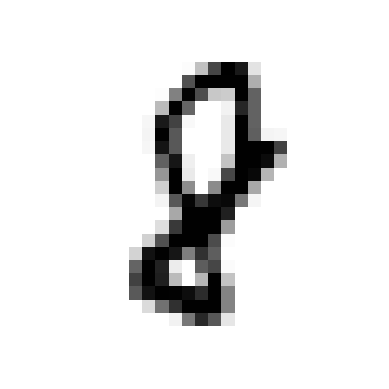

True label: 8, Predicted label: 8


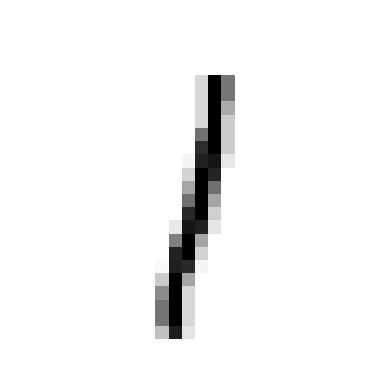

True label: 1, Predicted label: 1


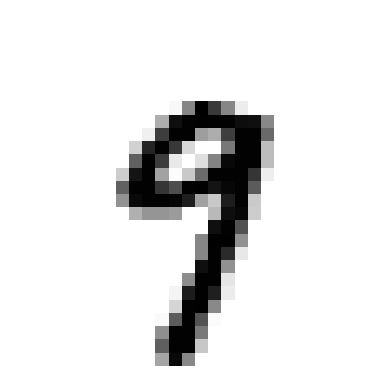

True label: 9, Predicted label: 9


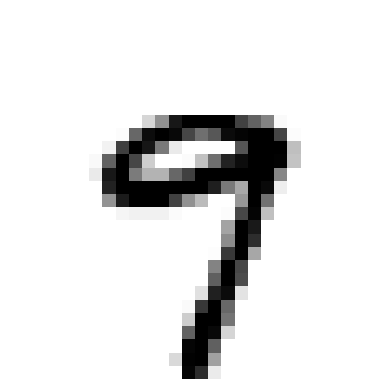

True label: 9, Predicted label: 7


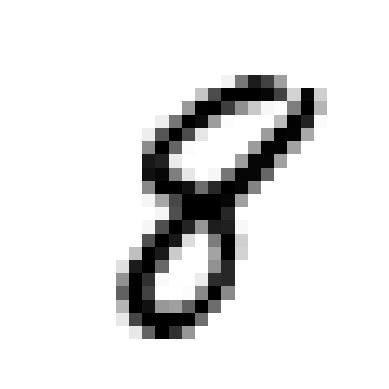

True label: 8, Predicted label: 8


In [49]:
#évaluation des performances du modèle regression logistique

X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

# Entraîner le modèle
model.fit(X_train2, y_train2)

# Prédictions sur l'ensemble de validation
y_valid_pred = model.predict(X_valid)

# Évaluer le modèle
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Afficher le rapport de classification
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualiser quelques prédictions
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

# Afficher quelques prédictions
for i in range(5):
    plot_digit(X_valid[i])
    print(f"True label: {y_valid[i]}, Predicted label: {y_valid_pred[i]}")

Accuracy: 96.29%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Matrix:
 [[802   0   1   2   2   2   4   0   3   0]
 [  0 900   4   1   1   1   1   1   0   0]
 [  3   5 810   2  11   2   4   3   5   1]
 [  1   1   6 891   2  12   0   7   9   8]
 [  1   1

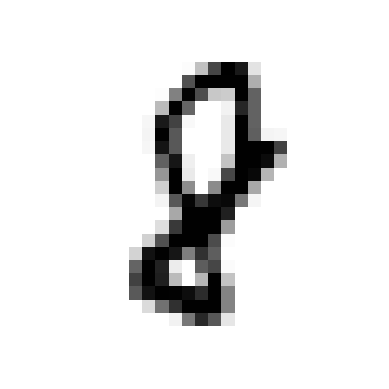

True label: 8, Predicted label: 8


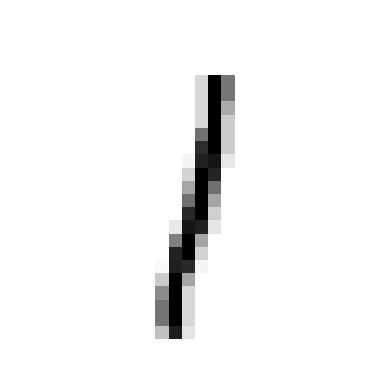

True label: 1, Predicted label: 1


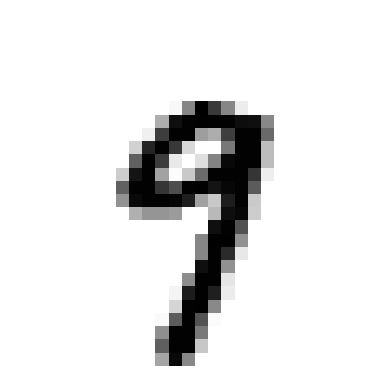

True label: 9, Predicted label: 9


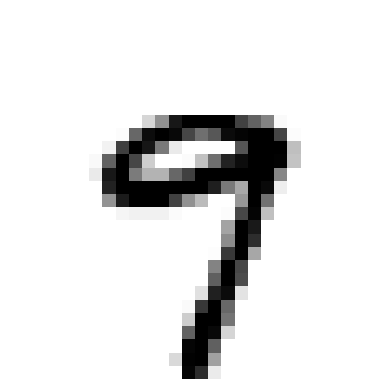

True label: 9, Predicted label: 9


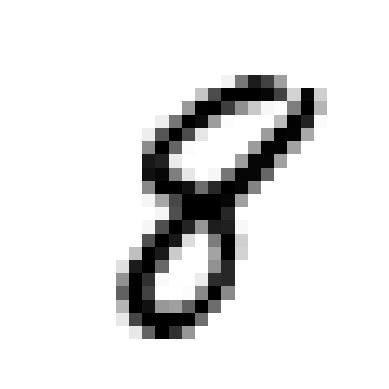

True label: 8, Predicted label: 8


In [56]:
#évaluation des performances du modèle foret aléatoire

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de forêt aléatoire
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
y_val_pred = rf_model.predict(X_val)

# Évaluer le modèle
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Afficher le rapport de classification
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualiser quelques prédictions
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

# Afficher quelques prédictions
for i in range(5):
    plot_digit(X_val[i])
    print(f"True label: {y_val[i]}, Predicted label: {y_val_pred[i]}")